# Step by step on training CNN using all bands info

### Library Loading

In [4]:
#pytorch lib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,shutil,warnings
import glob
import random 
import rasterio

from PIL import Image
from IPython.display import display
from torchvision import transforms
from typing import Tuple, Dict, List

random.seed(69)


### Data Preparation

Since the task is Image Classification, using ImageFolder is very easy and hard to have some error, however Custom Dataset style is prefered if image is not format properly or preprocess step is complicated

##### import all lib

### Data visualization

In [5]:
image_path = "datasets/EuroSATallBands/"
for dirpaths,dirnames,filenames in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpaths}'.")

There are 11 directories and 4 images in 'datasets/EuroSATallBands/'.
There are 0 directories and 3000 images in 'datasets/EuroSATallBands/AnnualCrop'.
There are 0 directories and 2500 images in 'datasets/EuroSATallBands/Industrial'.
There are 0 directories and 3000 images in 'datasets/EuroSATallBands/Forest'.
There are 0 directories and 2000 images in 'datasets/EuroSATallBands/Pasture'.
There are 0 directories and 3000 images in 'datasets/EuroSATallBands/HerbaceousVegetation'.
There are 0 directories and 2500 images in 'datasets/EuroSATallBands/River'.
There are 0 directories and 2500 images in 'datasets/EuroSATallBands/Highway'.
There are 0 directories and 2500 images in 'datasets/EuroSATallBands/PermanentCrop'.
There are 0 directories and 3597 images in 'datasets/EuroSATallBands/SeaLake'.
There are 0 directories and 1 images in 'datasets/EuroSATallBands/.ipynb_checkpoints'.
There are 0 directories and 3000 images in 'datasets/EuroSATallBands/Residential'.


In [6]:
train_dir = os.path.join(image_path,"train")
test_dir = os.path.join(image_path,"test")
train_dir, test_dir

('datasets/EuroSATallBands/train', 'datasets/EuroSATallBands/test')

File: datasets/EuroSATallBands/Industrial/Industrial_1.tif
Width: 64
Height: 64
Number of bands: 13
CRS: EPSG:32632
Transform: | 10.00, 0.00, 323455.65|
| 0.00,-9.98, 5507072.62|
| 0.00, 0.00, 1.00|


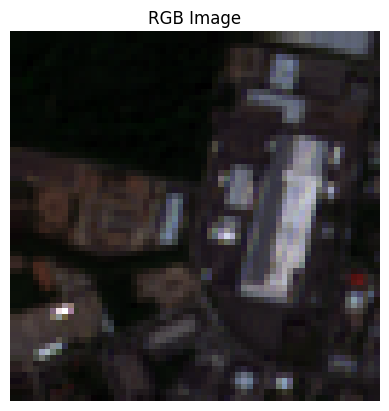

In [7]:
#View tif image using rasterio 
tiff_img = 'datasets/EuroSATallBands/Industrial/Industrial_1.tif'
with rasterio.open(tiff_img) as dataset:
    print(f"File: {tiff_img}")
    print(f"Width: {dataset.width}")
    print(f"Height: {dataset.height}")
    print(f"Number of bands: {dataset.count}")
    print(f"CRS: {dataset.crs}")
    print(f"Transform: {dataset.transform}")

    # Uncomment the below infos if you want to view infos in all bands
    # for band in range(1, dataset.count + 1):
    #     # Read the band data
    #     band_data = dataset.read(band)

    #Example of reading RGB from band
    red_band = dataset.read(4)   # Band 4
    green_band = dataset.read(3) # Band 3
    blue_band = dataset.read(2)  # Band 2
    
    def normalize(array):
        array_min, array_max = array.min(), array.max()
        return (array - array_min) / (array_max - array_min)

    #you can uncomment this to test what happened if not normalized properly
    red = normalize(red_band)
    green = normalize(green_band)
    blue = normalize(blue_band)

    # Stack the bands to create an RGB image
    rgb = np.dstack((red, green, blue))

    # Display the RGB image
    plt.imshow(rgb)
    plt.title('RGB Image')
    plt.axis('off')  # Hide the ax
    plt.show()


### Using Dataloader
Unlike ViT file, we use the DataLoader instead of ImageFolder since we've to preprocess the TIFF file instead of just use PNG/JPG file

In [8]:
# Converted all Tif into 6 band TIF file

tiff_image_path = glob.glob("datasets/EuroSATallBands/*/*.tif")
png_image_path = os.path.join("datasets/","EUROSATSixBands")
os.makedirs(png_image_path,exist_ok=True)

In [9]:
#helper fx
def normalize(arr):
    arr_min,arr_max = arr.min(),arr.max()
    return (arr-arr_min) / (arr_max-arr_min)

In [31]:
class EuroSATMultiBandDataset(Dataset):
    def __init__(self, annotation_file, img_dir , transform=None,target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_dir = img_dir
        self.target_transform = target_transform

    def __getitem__(self,idx):
        file_paths = self.img_dir
        with rasterio.open(filename) as dataset:
            band2 = dataset.read(2)  # Blue
            band3 = dataset.read(3)  # Green
            band4 = dataset.read(4)  # Red
            band8 = dataset.read(8)  # NIR
            band11 = dataset.read(11) # SWIR1
            band12 = dataset.read(12) # SWIR2
    
            bands = [band2, band3, band4, band8, band11, band12]
            normalized_band = [normalize(band) for band in bands]
    
            #axis -1 for [h,w,vol], else it will be [vol,h,w]
            stacked_band = np.stack(normalized_band, axis =-1)
    
            #convert back from multipleband to img to use later
            
            
            break

    
    def __len__(self):
        return len(self.file_paths)

        
        
    